In [1]:
#include <iostream>
#include <string>
#include <stdio.h>
#include <TMath.h>

In [2]:
TFile *file = TFile::Open("../Tracks_Clusters.root");
TTree *tree = (TTree*) file->Get("JetRecoTree");
tree->Print();

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

# Excercise 1

In [3]:
Float_t mu = -1;
tree->SetBranchAddress("mu_average",&mu);
TCanvas *canvas = new TCanvas("Canvas","Canvas",800,600);
TH1F *hist_mu = new TH1F("MU","Average interactions;Mu average;Events",99,1,100);

In [4]:
int nentries,nbytes,i;
nentries=(Int_t) tree->GetEntries();
for(i=0;i<nentries;i++){
    nbytes=tree->GetEntry(i);
    hist_mu->Fill(mu);
}
std::cout<<"Done"<<std::endl;

Done


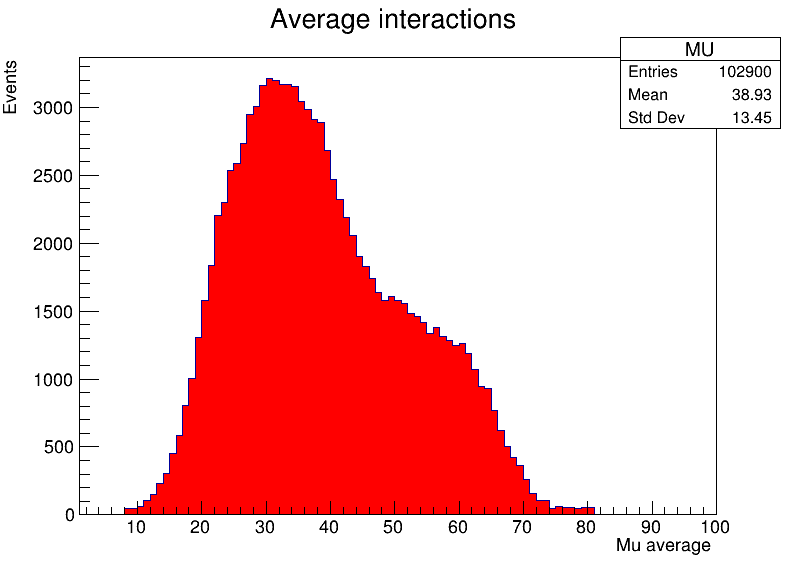

In [5]:
hist_mu->SetFillColor(kRed);
hist_mu->Draw();
canvas->Draw();

# Excercise 2

In [6]:
UInt_t npv = -1;
Float_t mu_average = -1;

tree->SetBranchAddress("NPV",&npv);
tree->SetBranchAddress("mu_average",&mu_average);
TCanvas *canvas = new TCanvas("Canvas","Canvas",800,600);
TH2C *NPV_MU = new TH2C("NPV_MU","NPV vs Average interactions;Mu average;NPV",80,0,100,40,0,50);


int nentries,nbytes,i;
nentries=(Int_t) tree->GetEntries();
for(i=0;i<nentries;i++){
    nbytes=tree->GetEntry(i);
    NPV_MU->Fill(mu_average,npv);
}
std::cout<<"Done"<<std::endl;

Done


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


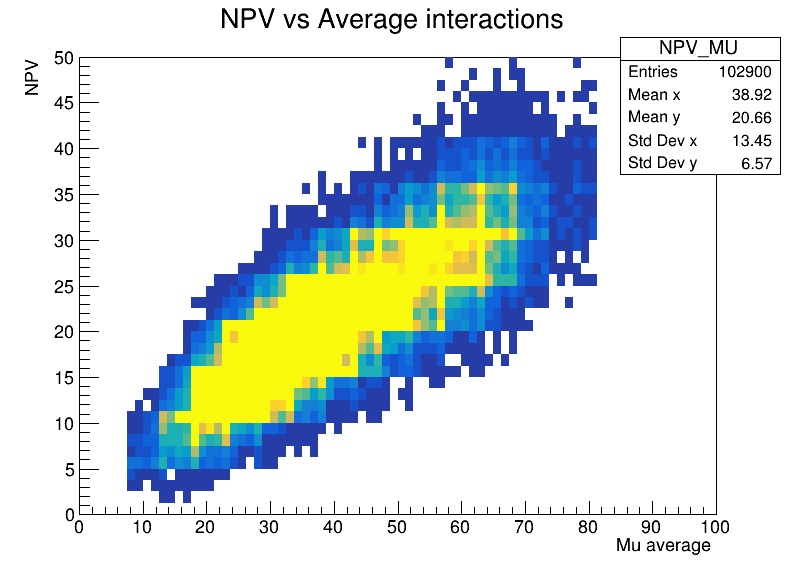

In [7]:
NPV_MU->SetFillColor(kBlue);
NPV_MU->Draw("col");
canvas->Draw();

# Excercise 3

In [8]:
vector<float> *tracks_pt;
vector<float> *clusters_pt;

tree->SetBranchAddress("Tracks_pt",&tracks_pt);
tree->SetBranchAddress("Clusters_pt",&clusters_pt);
    
TH2F *NPV_nTracks = new TH2F("NPV_nTracks","NPV vs nTracks;nTracks;NPV",1000,0,3000,49,0,50);
TH2F *NPV_nClusters = new TH2F("NPV_nClusters","NPV vs nClusters;nClusters;NPV",700,0,1800,49,0,50);
TH2F *mu_nTracks = new TH2F("mu_nTracks","mu_average vs nTracks;nTracks;mu",1000,0,3000,99,0,100);
TH2F *mu_nClusters = new TH2F("mu_nClusters","mu_average vs nClusters;nClusters;mu",700,0,1800,99,0,100);

In [9]:
for(i=0;i<nentries;i++){
    nbytes=nbytes=tree->GetEntry(i);
    NPV_nTracks->Fill(tracks_pt->size(),npv);
    NPV_nClusters->Fill(clusters_pt->size(),npv);
    mu_nTracks->Fill(tracks_pt->size(),mu_average);
    mu_nClusters->Fill(clusters_pt->size(),mu_average);
}
std::cout<<"Done"<<std::endl;

Done


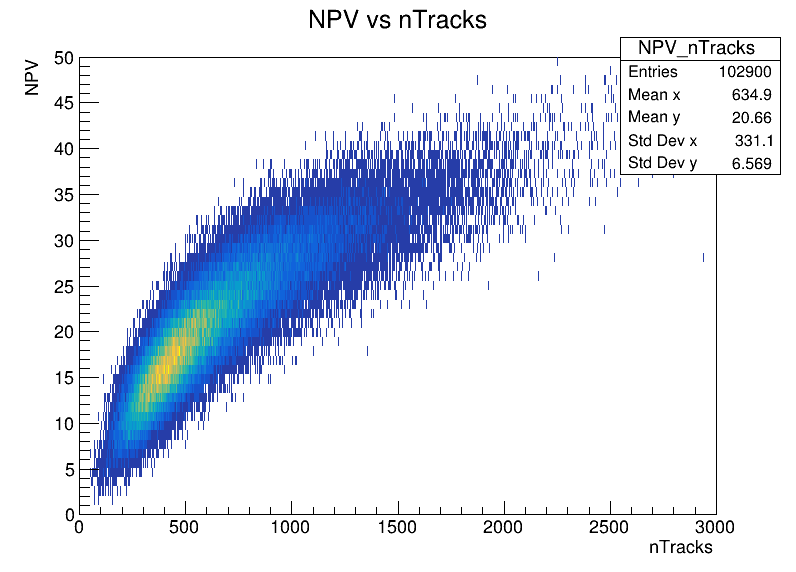

In [10]:
NPV_nTracks->SetFillColor(kGreen);
NPV_nTracks->Draw("col");
canvas->Draw();

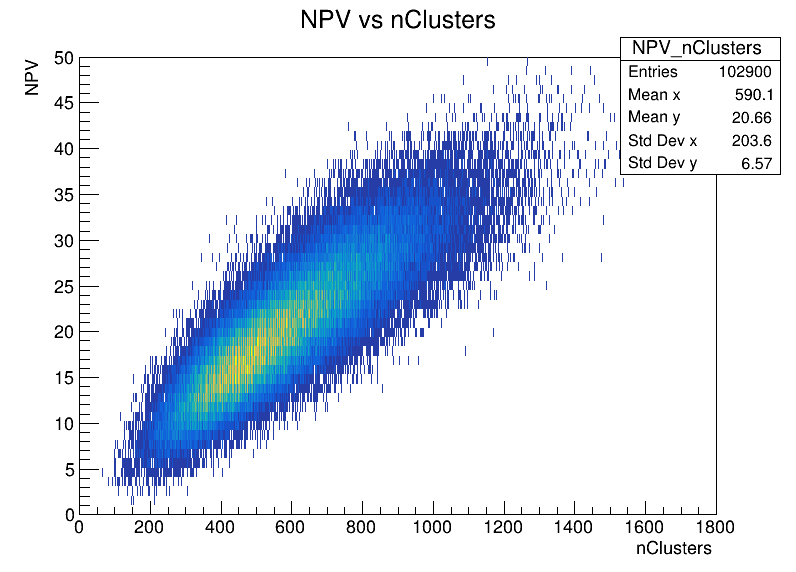

In [11]:
NPV_nClusters->SetFillColor(kYellow);
NPV_nClusters->Draw("col");
canvas->Draw();

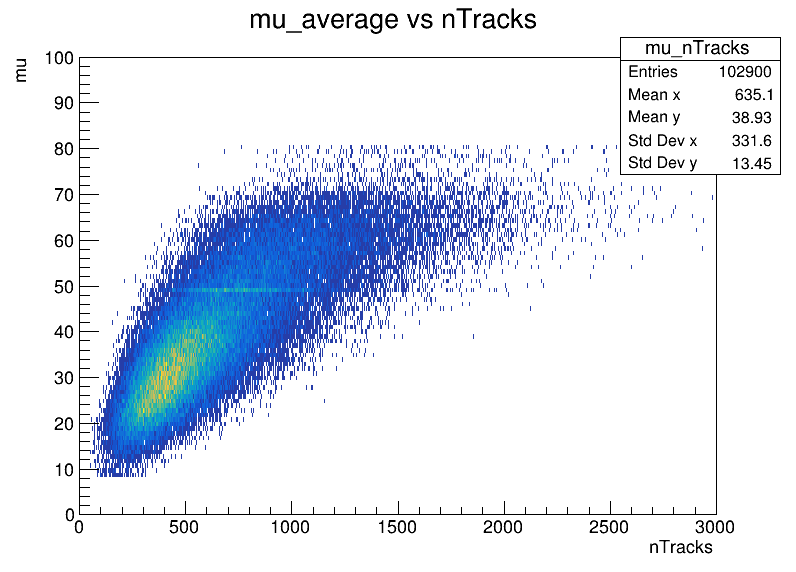

In [12]:
mu_nTracks->SetFillColor(kBlue);
mu_nTracks->Draw("col");
canvas->Draw();

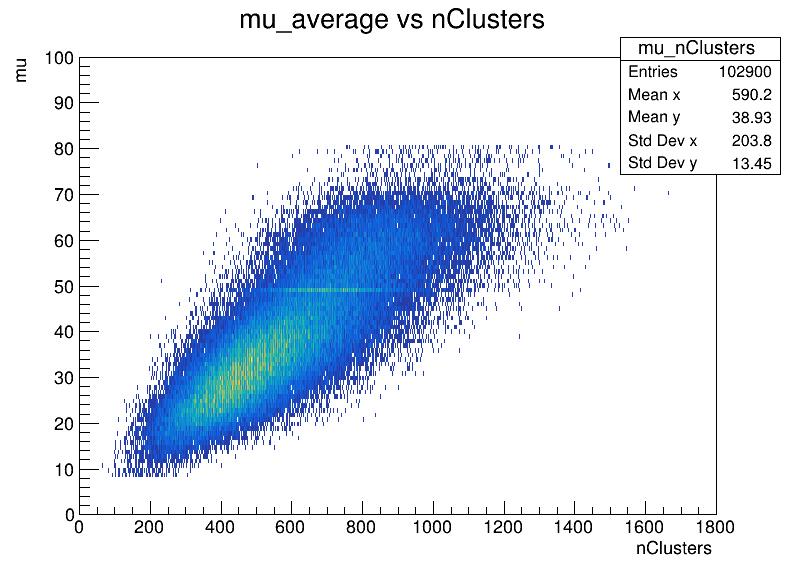

In [13]:
mu_nClusters->SetFillColor(kBlue);
mu_nClusters->Draw("col");
canvas->Draw();

# Excercise 4

In [65]:
vector<float> *tracks_pt;
vector<float> *tracks_eta;
vector<float> *tracks_phi;
vector<float> *tracks_m;
vector<float> *tracks_vtx;

vector<float> *clusters_pt;
vector<float> *clusters_eta;
vector<float> *clusters_phi;
vector<float> *clusters_m;

vector<float> *particles_pt;
vector<float> *particles_eta;
vector<float> *particles_phi;
vector<float> *particles_m;
vector<int> *particles_pdgID;

tree->SetBranchAddress("Tracks_pt",&tracks_pt);
tree->SetBranchAddress("Tracks_eta",&tracks_eta);
tree->SetBranchAddress("Tracks_phi",&tracks_phi);
tree->SetBranchAddress("Tracks_m",&tracks_m);
tree->SetBranchAddress("Tracks_vtx",&tracks_vtx);

tree->SetBranchAddress("Clusters_pt",&clusters_pt);
tree->SetBranchAddress("Clusters_eta",&clusters_eta);
tree->SetBranchAddress("Clusters_phi",&clusters_phi);
tree->SetBranchAddress("Clusters_m",&clusters_m);

tree->SetBranchAddress("Particles_pt",&particles_pt);
tree->SetBranchAddress("Particles_eta",&particles_eta);
tree->SetBranchAddress("Particles_phi",&particles_phi);
tree->SetBranchAddress("Particles_m",&particles_m);
tree->SetBranchAddress("Particles_pdgID",&particles_pdgID);

TH1F *htracks_pt = new TH1F("tracks_pt","Track pT;pT (MeV);Events",1000,0,3000);
TH1F *htracks_eta = new TH1F("tracks_eta","Track eta;eta ;Events",20,-5,5);
TH1F *htracks_phi = new TH1F("tracks_phi","Track phi;phi (rad);Events",100,-4,4);
TH1F *htracks_m = new TH1F("tracks_m","Track m;m;Events",20,0,150);
TH1F *htracks_vtx = new TH1F("tracks_vtx","Track vtx;vtx;Events",30,0,40);

TH1F *hclusters_pt = new TH1F("tracks_pt","Cluster pT;pT (MeV);Events",1000,0,3500);
TH1F *hclusters_eta = new TH1F("tracks_eta","Cluster eta;eta;Events",20,-5,5);
TH1F *hclusters_phi = new TH1F("tracks_phi","Cluster phi;phi (rad);Events",100,-4,4);
TH1F *hclusters_m = new TH1F("tracks_m","Cluster m;m;Events",20,0,5);

TH1F *hparticles_pt = new TH1F("particles_pt","Particles pT;pT (MeV);Events",1000,0,2000);
TH1F *hparticles_eta = new TH1F("particles_eta","Particles eta;eta;Events",20,-5,5);
TH1F *hparticles_phi = new TH1F("particles_phi","Particles phi;phi (rad);Events",100,-4,4);
TH1F *hparticles_m = new TH1F("particles_m","Particles m;m;Events",60,0,1500);
TH1F *hparticles_pdgID = new TH1F("particles_pdgID","Particles pdgID;pdgID;Events",100,0,500);

Warning in <TFile::Append>: Replacing existing TH1: tracks_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: tracks_eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: tracks_phi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: tracks_m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: tracks_vtx (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: tracks_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: tracks_eta (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: tracks_phi (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: tracks_m (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: particles_pt (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: particles_eta (Potential memory leak).
Warning in <TFile::Append>: Repla

In [66]:
std::cout<<tracks_pt->size()<<"\n"
         <<tracks_eta->size()<<"\n"
         <<tracks_phi->size()<<"\n"
         <<tracks_m->size()<<"\n"
         <<tracks_vtx->size()<<"\n"
         <<clusters_pt->size()<<"\n"
         <<clusters_eta->size()<<"\n"
         <<clusters_phi->size()<<"\n"
         <<clusters_m->size()<<"\n"
         <<particles_pt->size()<<"\n"
         <<particles_eta->size()<<"\n"
         <<particles_phi->size()<<"\n"
         <<particles_m->size()<<"\n"
         <<particles_pdgID->size()<<std::endl;

0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [67]:
for (i = 0; i < nentries; i++)
{
    nbytes = tree->GetEntry(i);
    for(int tr=0; tr<tracks_pt->size(); tr++){
        htracks_pt->Fill(tracks_pt->at(tr));
        htracks_eta->Fill(tracks_eta->at(tr));
        htracks_phi->Fill(tracks_phi->at(tr));
        htracks_m->Fill(tracks_m->at(tr));
        htracks_vtx->Fill(tracks_vtx->at(tr));
    }
    for(int tr=0; tr<clusters_pt->size(); tr++){
        hclusters_pt->Fill(clusters_pt->at(tr));
        hclusters_eta->Fill(clusters_eta->at(tr));
        hclusters_phi->Fill(clusters_phi->at(tr));
        hclusters_m->Fill(clusters_m->at(tr));
    }
    for(int tr=0; tr<particles_pt->size(); tr++){
        hparticles_pt->Fill(particles_pt->at(tr));
        hparticles_eta->Fill(particles_eta->at(tr));
        hparticles_phi->Fill(particles_phi->at(tr));
        hparticles_m->Fill(particles_m->at(tr));
        hparticles_pdgID->Fill(particles_pdgID->at(tr));
    }
}

std::cout << "Done!" << std::endl;

Done!


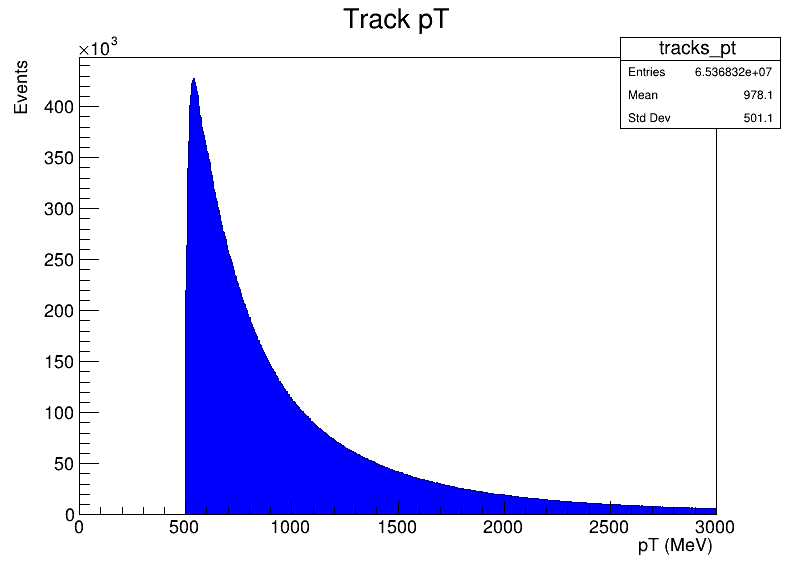

In [68]:
htracks_pt->SetFillColor(kBlue);
htracks_pt->Draw();
canvas->Draw();


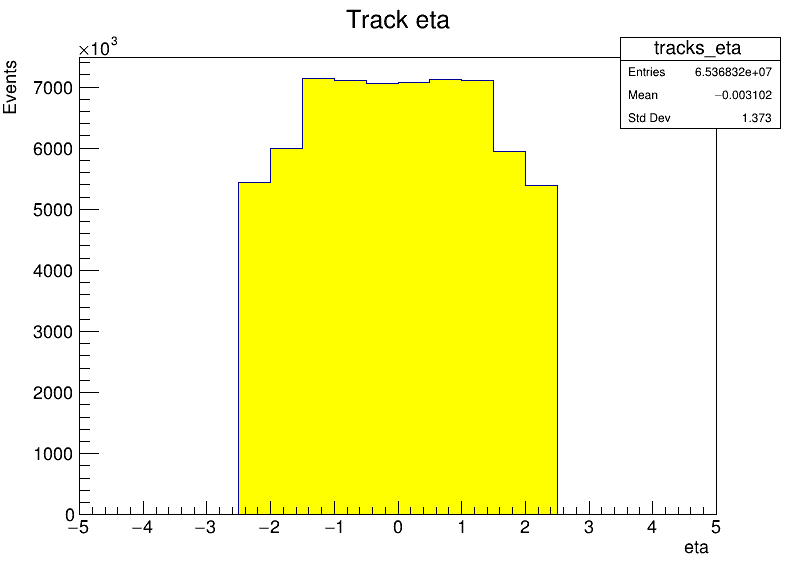

In [69]:
htracks_eta->SetFillColor(kYellow);
htracks_eta->Draw();
canvas->Draw();

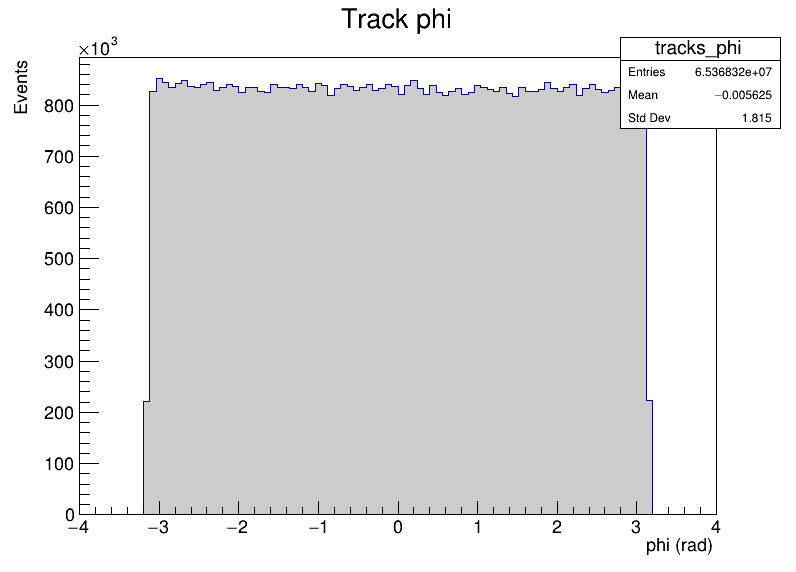

In [70]:
htracks_phi->SetFillColor(kGray);
htracks_phi->Draw();
canvas->Draw();

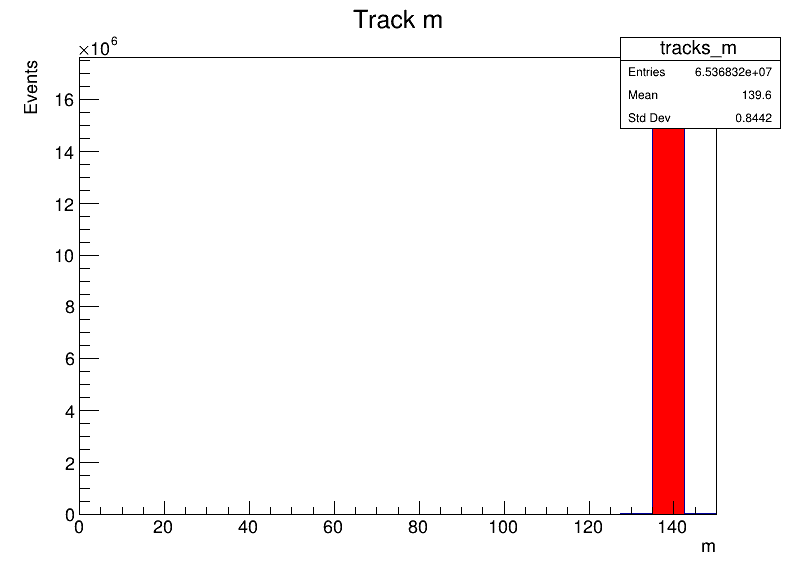

In [71]:
htracks_m->SetFillColor(kRed);
htracks_m->Draw();
canvas->Draw();

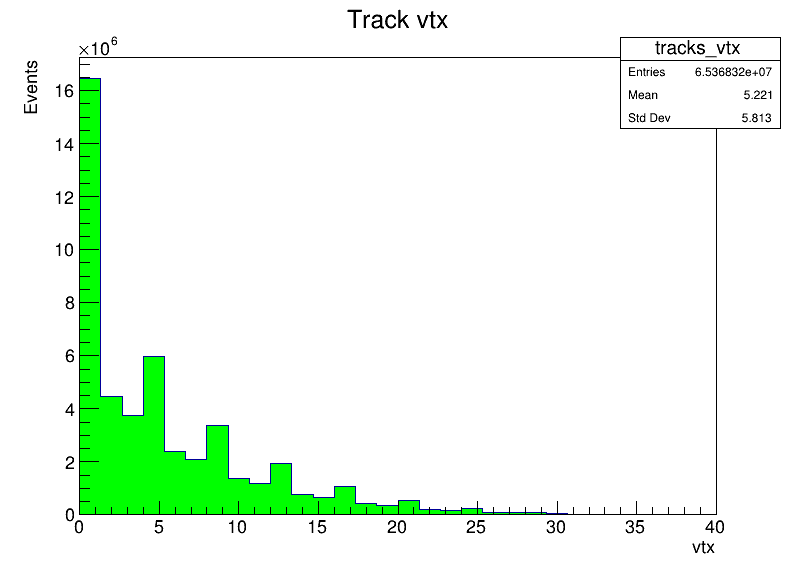

In [72]:
htracks_vtx->SetFillColor(kGreen);
htracks_vtx->Draw();
canvas->Draw();

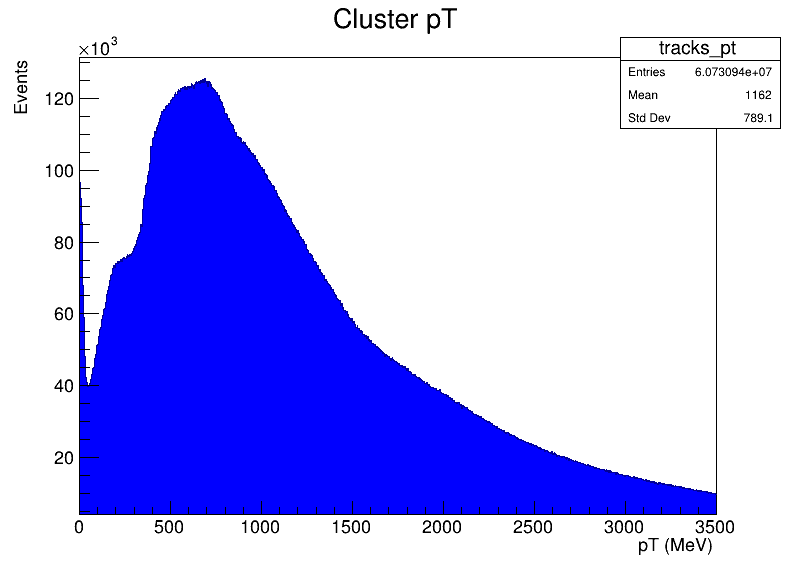

In [73]:
hclusters_pt->SetFillColor(kBlue);
hclusters_pt->Draw();
canvas->Draw();

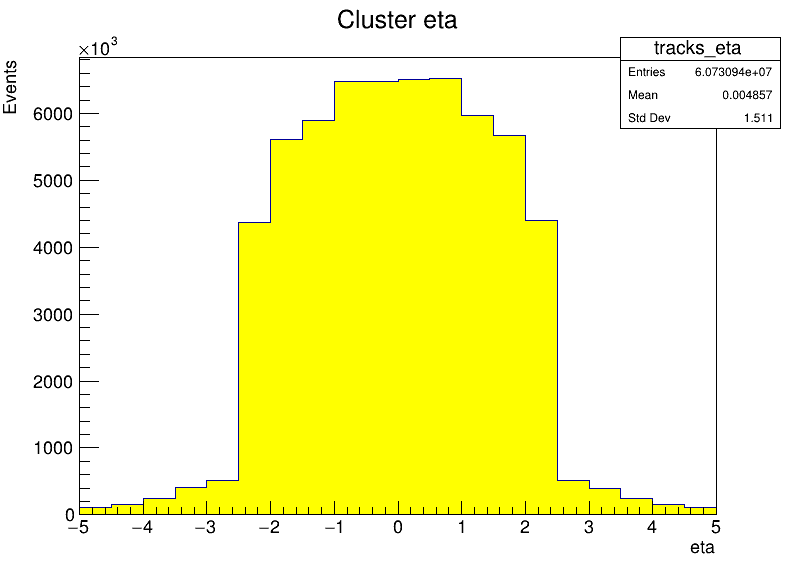

In [74]:
hclusters_eta->SetFillColor(kYellow);
hclusters_eta->Draw();
canvas->Draw();

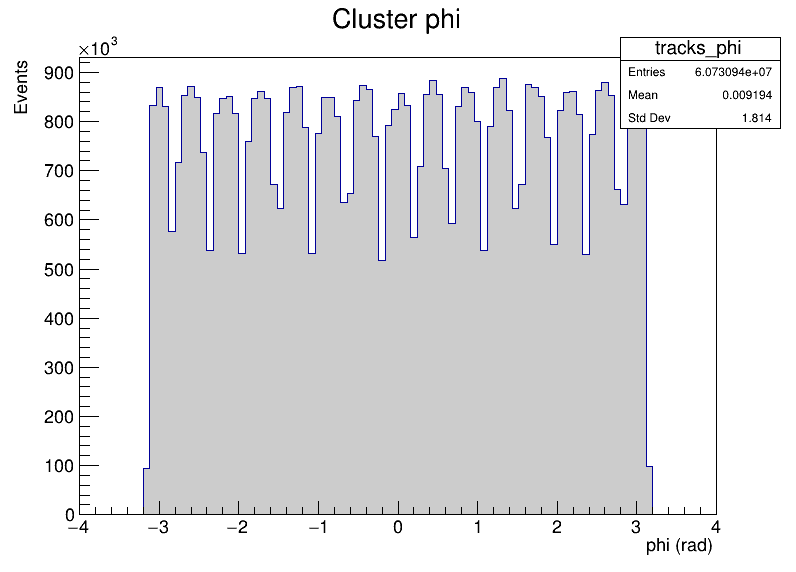

In [75]:
hclusters_phi->SetFillColor(kGray);
hclusters_phi->Draw();
canvas->Draw();

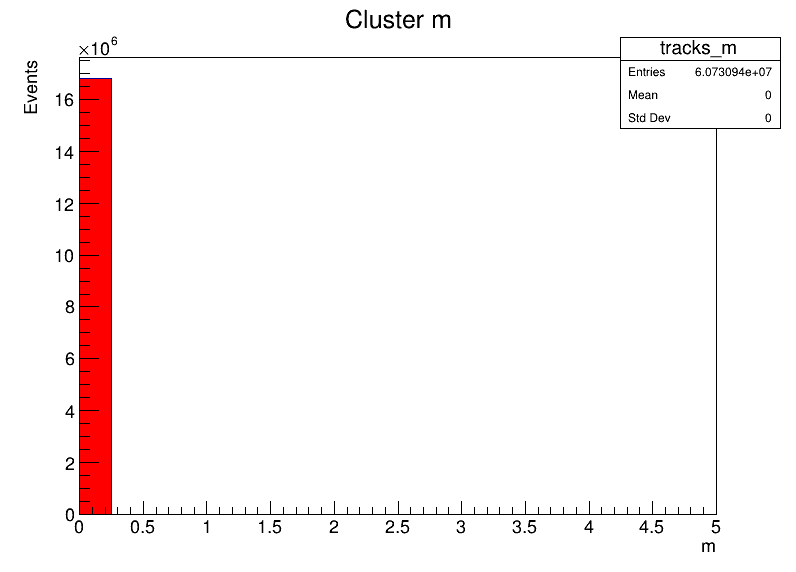

In [76]:
hclusters_m->SetFillColor(kRed);
hclusters_m->Draw();
canvas->Draw();

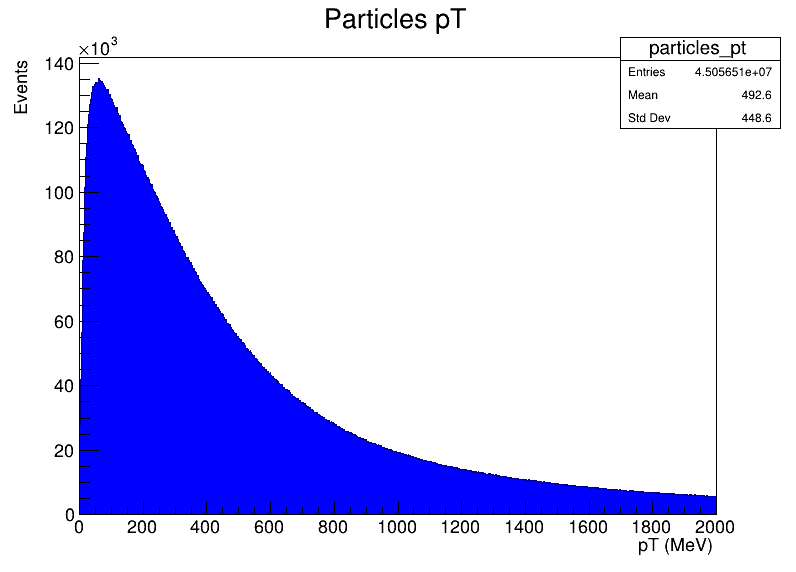

In [77]:
hparticles_pt->SetFillColor(kBlue);
hparticles_pt->Draw();
canvas->Draw();

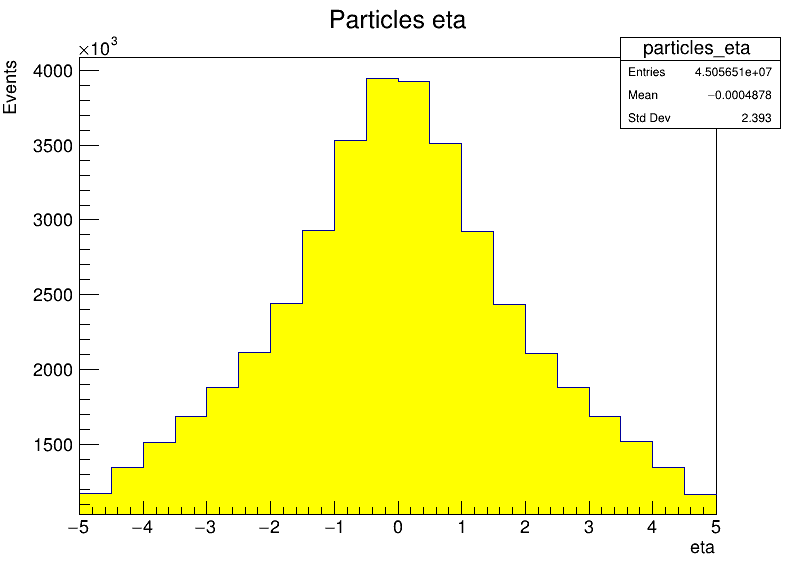

In [78]:
hparticles_eta->SetFillColor(kYellow);
hparticles_eta->Draw();
canvas->Draw();

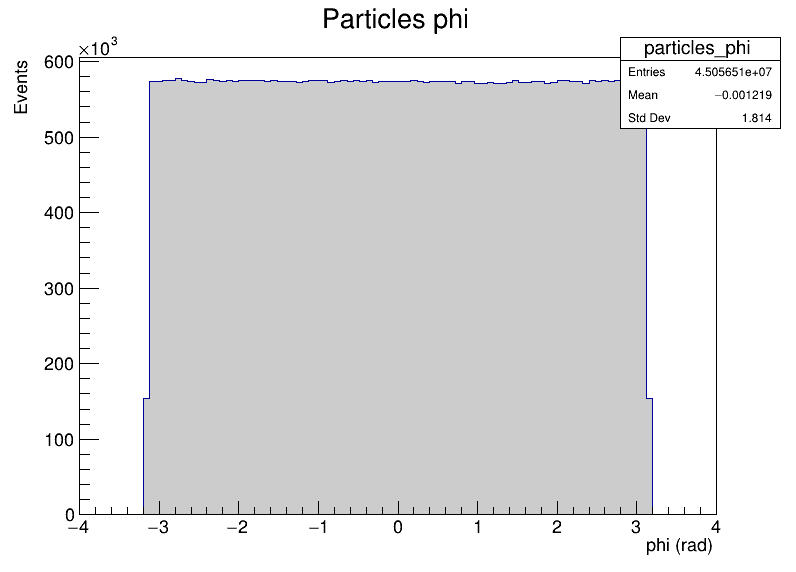

In [79]:
hparticles_phi->SetFillColor(kGray);
hparticles_phi->Draw();
canvas->Draw();

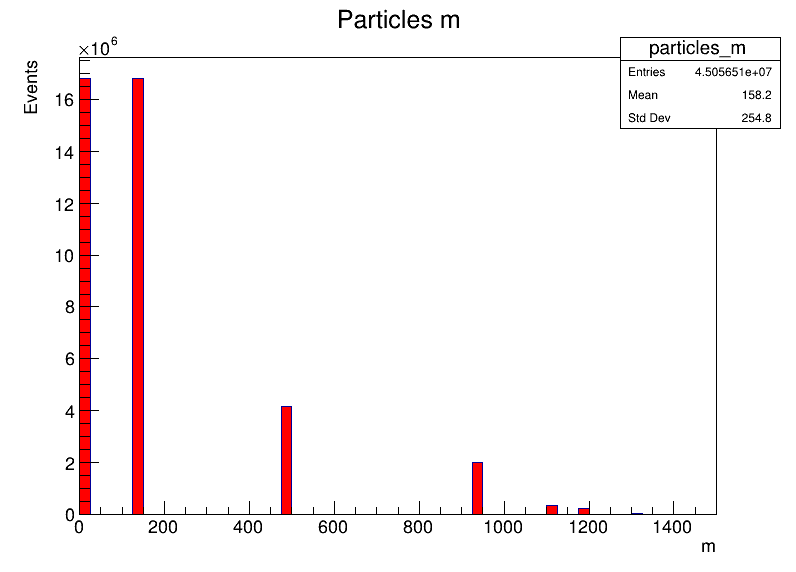

In [80]:
hparticles_m->SetFillColor(kRed);
hparticles_m->Draw();
canvas->Draw();

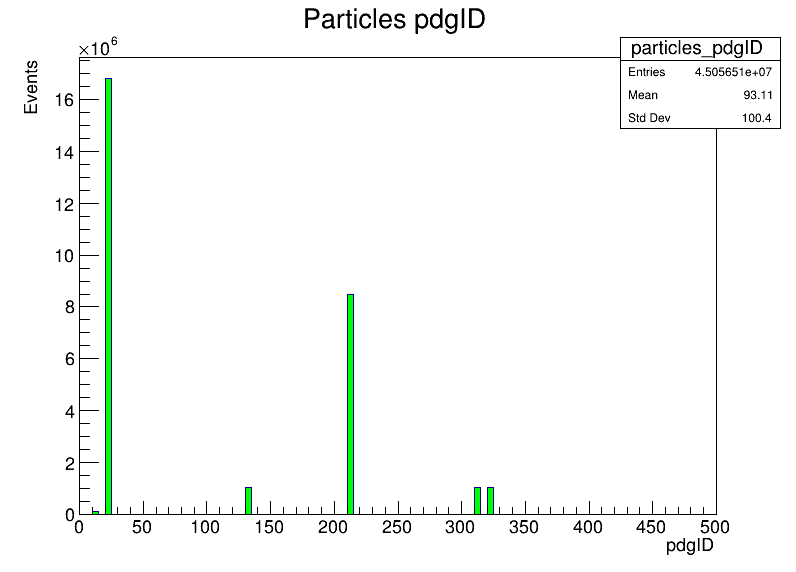

Info in <TCanvas::Print>: png file hparticles_pdgID.png has been created


In [82]:
hparticles_pdgID->SetFillColor(kGreen);
hparticles_pdgID->Draw();
canvas->Draw();
canvas->SaveAs("hparticles_pdgID.png")

# Excercise 5

# Excercise 6

El atributo "particle PDG ID" es un código de identificación para cada una de las particulas, tanto las elementales, como las particulas compuestas como los hadrones, e incluso los nucleos atómicos. Las particulas de materia se identifican con números positivos, mientras que las antiparticulas con valores negativos; adicionalmente, en algunas particulas como los hadrones, los códigos de identificación se basan en el contenido de los quarks y en los números cuanticos de estos. 